# VARモデル、グレンジャー因果性
2003年1月1日〜2008年4月までのMSCIデータを使用した。

statsmodels
https://www.statsmodels.org/dev/vector_ar.html
Pythonを使ってVARモデルにおける多変量時系列予測モデルの構築
https://www.dskomei.com/entry/2020/10/13/073126

In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa import stattools
from statsmodels.tsa.api import VAR
import seaborn as sns
import matplotlib.pyplot as plt

result_dir_path = Path('result')
if not result_dir_path.exists():
    result_dir_path.mkdir(parents=True)

In [3]:
df = pd.read_excel("/Users/ShuntaroMiwa/00 python/takemura/msci_day.xls"
                 ,index_col=0)
df.dtypes

ca    float64
fr    float64
ge    float64
it    float64
jp    float64
uk    float64
us    float64
dtype: object

In [4]:
df.head()

,ca,fr,ge,it,jp,uk,us
Date,,,,,,,
2003-01-01,560.099,902.081,724.932,290.187,1593.175,791.076,824.583
2003-01-02,574.701,927.206,768.150,296.963,1578.214,797.813,852.219
2003-01-03,580.212,929.297,768.411,298.757,1578.411,800.175,851.935
2003-01-06,589.619,943.002,788.164,303.273,1619.700,803.966,871.515
2003-01-07,585.822,923.785,774.054,297.892,1590.951,793.625,865.992


In [6]:
df.columns = [' CA', 'FR', 'GE','IT', 'JP', 'UK', 'US']
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1391 entries, 2003-01-01 to 2008-04-30
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0    CA     1391 non-null   float64
 1   FR      1391 non-null   float64
 2   GE      1391 non-null   float64
 3   IT      1391 non-null   float64
 4   JP      1391 non-null   float64
 5   UK      1391 non-null   float64
 6   US      1391 non-null   float64
dtypes: float64(7)
memory usage: 86.9 KB


In [7]:
target_data = df[['JP', 'UK', 'US']]
target_data.shape

(1391, 3)

In [158]:
plot_data = target_data.stack()
plot_data = plot_data.reset_index()
plot_data.columns = ['date', 'country', 'value']
plot_data.head()

,date,country,value
0,01-Jan-16,JP,2808.29
1,01-Jan-16,UK,1116.72
2,01-Jan-16,US,1949.70
3,04-Jan-16,JP,2763.01
4,04-Jan-16,UK,1086.46


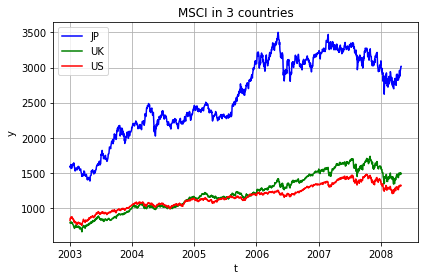

In [8]:
fig, ax = plt.subplots()

t = df.index
y1 = df['JP']
y2 = df['UK']
y3 = df['US']

c1,c2,c3 = "blue","green","red"      # 各プロットの色
l1,l2,l3= "JP","UK","US"   # 各ラベル

ax.set_xlabel('t')  # x軸ラベル
ax.set_ylabel('y')  # y軸ラベル
ax.set_title('MSCI in 3 countries') # グラフタイトル
# ax.set_aspect('equal') # スケールを揃える
ax.grid()            # 罫線
#ax.set_xlim([-10, 10]) # x方向の描画範囲を指定
#ax.set_ylim([0, 1])    # y方向の描画範囲を指定
ax.plot(t, y1, color=c1, label=l1)
ax.plot(t, y2, color=c2, label=l2)
ax.plot(t, y3, color=c3, label=l3)
ax.legend(loc=0)    # 凡例
fig.tight_layout()  # レイアウトの設定
# plt.savefig('hoge.png') # 画像の保存
plt.show()

In [9]:
adf = stattools.adfuller(df['JP'], regression='ctt')
print('t値 : {:.2f}, p値 : {:.1f}%'.format(adf[0], adf[1]*100))
print('データ数 : {}, 使用されたラグ数 : {}'.format(adf[3], adf[2]))
print('検定統計量における棄却値 : 1%={:.2f}, 5%={:.2f}, 10%={:.2f}'.format(
    adf[4]['1%'], adf[4]['5%'], adf[4]['10%']
    ))


t値 : -3.00, p値 : 29.5%
データ数 : 1388, 使用されたラグ数 : 2
検定統計量における棄却値 : 1%=-4.38, 5%=-3.84, 10%=-3.56


In [10]:
adf = stattools.adfuller(df['UK'], regression='ctt')
print('t値 : {:.2f}, p値 : {:.1f}%'.format(adf[0], adf[1]*100))
print('データ数 : {}, 使用されたラグ数 : {}'.format(adf[3], adf[2]))
print('検定統計量における棄却値 : 1%={:.2f}, 5%={:.2f}, 10%={:.2f}'.format(
    adf[4]['1%'], adf[4]['5%'], adf[4]['10%']
    ))


t値 : -2.91, p値 : 33.8%
データ数 : 1387, 使用されたラグ数 : 3
検定統計量における棄却値 : 1%=-4.38, 5%=-3.84, 10%=-3.56


In [11]:
adf = stattools.adfuller(df['US'], regression='ctt')
print('t値 : {:.2f}, p値 : {:.1f}%'.format(adf[0], adf[1]*100))
print('データ数 : {}, 使用されたラグ数 : {}'.format(adf[3], adf[2]))
print('検定統計量における棄却値 : 1%={:.2f}, 5%={:.2f}, 10%={:.2f}'.format(
    adf[4]['1%'], adf[4]['5%'], adf[4]['10%']
    ))


t値 : -3.12, p値 : 24.2%
データ数 : 1389, 使用されたラグ数 : 1
検定統計量における棄却値 : 1%=-4.38, 5%=-3.84, 10%=-3.56


### 以上のADF検定から、３つの変数は単位根過程であるという帰無仮説を棄却できない。

### 株式収益率（対数の差）による分析

In [12]:
#macro_data['year'] = macro_data['year'].astype(int)

# macro_data.index = pd.date_range(
#     str(macro_data['year'].min()), 
#     periods=len(macro_data), 
#     freq='Q'
# )
columns = ['JP', 'UK', 'US']
target_data2 = df[columns].copy()

target_data_lg = np.log(target_data2) - np.log(target_data2.shift(1))#対数の差
target_data_lg.dropna(inplace=True)
target_data_lg *= 100

target_data2.head()

,JP,UK,US
Date,,,
2003-01-01,1593.175,791.076,824.583
2003-01-02,1578.214,797.813,852.219
2003-01-03,1578.411,800.175,851.935
2003-01-06,1619.700,803.966,871.515
2003-01-07,1590.951,793.625,865.992


In [13]:
print(np.log(1578.214)-np.log(1593.175))

-0.009435052581561187


In [14]:
target_data_lg.head()

,JP,UK,US
Date,,,
2003-01-02,-0.943505,0.848019,3.296573
2003-01-03,0.012482,0.295622,-0.033330
2003-01-06,2.582230,0.472653,2.272284
2003-01-07,-1.790900,-1.294592,-0.635741
2003-01-08,-1.672348,-1.275576,-1.464613


In [15]:
plot_data = target_data_lg.stack()
plot_data = plot_data.reset_index()
plot_data.columns = ['Date', 'country', 'value']

plot_data.head()

,Date,country,value
0,2003-01-02,JP,-0.943505
1,2003-01-02,UK,0.848019
2,2003-01-02,US,3.296573
3,2003-01-03,JP,0.012482
4,2003-01-03,UK,0.295622


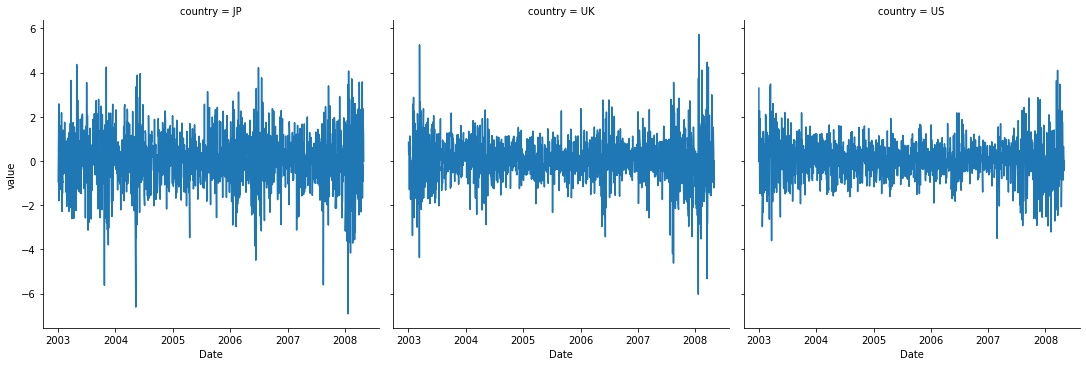

In [16]:
sns.relplot(
    data=plot_data,
    x='Date',
    y='value',
    col='country',
    kind='line'
)

In [17]:
adf = stattools.adfuller(target_data_lg['JP'], regression='ctt')
print('t値 : {:.2f}, p値 : {:.1f}%'.format(adf[0], adf[1]*100))
print('データ数 : {}, 使用されたラグ数 : {}'.format(adf[3], adf[2]))
print('検定統計量における棄却値 : 1%={:.2f}, 5%={:.2f}, 10%={:.2f}'.format(
    adf[4]['1%'], adf[4]['5%'], adf[4]['10%']
    ))

t値 : -28.14, p値 : 0.0%
データ数 : 1388, 使用されたラグ数 : 1
検定統計量における棄却値 : 1%=-4.38, 5%=-3.84, 10%=-3.56


In [18]:
adf = stattools.adfuller(target_data_lg['UK'], regression='ctt')
print('t値 : {:.2f}, p値 : {:.1f}%'.format(adf[0], adf[1]*100))
print('データ数 : {}, 使用されたラグ数 : {}'.format(adf[3], adf[2]))
print('検定統計量における棄却値 : 1%={:.2f}, 5%={:.2f}, 10%={:.2f}'.format(
    adf[4]['1%'], adf[4]['5%'], adf[4]['10%']
    ))

t値 : -22.88, p値 : 0.0%
データ数 : 1387, 使用されたラグ数 : 2
検定統計量における棄却値 : 1%=-4.38, 5%=-3.84, 10%=-3.56


In [46]:
adf = stattools.adfuller(target_data_lg['US'], regression='ctt')
print('t値 : {:.2f}, p値 : {:.1f}%'.format(adf[0], adf[1]*100))
print('データ数 : {}, 使用されたラグ数 : {}'.format(adf[3], adf[2]))
print('検定統計量における棄却値 : 1%={:.2f}, 5%={:.2f}, 10%={:.2f}'.format(
    adf[4]['1%'], adf[4]['5%'], adf[4]['10%']
    ))

t値 : -16.11, p値 : 0.0%
データ数 : 1383, 使用されたラグ数 : 6
検定統計量における棄却値 : 1%=-4.38, 5%=-3.84, 10%=-3.56


### 以上のADF検定から３変数は単位根過程でないことが確認できたため、以降はモデル選択を行う。

In [19]:
model2 = VAR(target_data_lg)
model2.select_order(15).summary()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'


,AIC,BIC,FPE,HQIC
0,0.05768,0.06908,1.059,0.06194
1,-0.3516,-0.3060*,0.7035,-0.3346
2,-0.3809,-0.3011,0.6832,-0.3511*
3,-0.3820*,-0.2680,0.6825*,-0.3393
4,-0.3759,-0.2277,0.6866,-0.3205
5,-0.3724,-0.1899,0.6891,-0.3041
6,-0.3734,-0.1568,0.6884,-0.2924
7,-0.3647,-0.1139,0.6944,-0.2709
8,-0.3597,-0.07467,0.6979,-0.2531
9,-0.3540,-0.03471,0.7019,-0.2345


### AIC他の結果に基づき、次数は3を選択した。

In [21]:
model_result = model2.fit(maxlags=3, ic='aic')
model_result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 24, Jun, 2021
Time:                     16:02:57
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                  -0.285039
Nobs:                     1388.00    HQIC:                 -0.334628
Log likelihood:          -5634.67    FPE:                   0.694716
AIC:                    -0.364252    Det(Omega_mle):        0.684310
--------------------------------------------------------------------
Results for equation JP
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.023006         0.030980            0.743           0.458
L1.JP        -0.136725         0.027134           -5.039           0.000
L1.UK         0.219183         0.036474            6.009           0.000
L1.US         0.511539

### Granger因果効果

In [28]:
GC = model_result.test_causality('JP', 'UK', kind='f', signif=0.05)
GC.summary()

Test statistic,Critical value,p-value,df
18.51,2.998,0.000,"(2, 4143)"


In [30]:
GC = model_result.test_causality('JP', 'US', kind='f', signif=0.05)
GC.summary()

Test statistic,Critical value,p-value,df
78.74,2.998,0.000,"(2, 4143)"


In [31]:
GC = model_result.test_causality('UK', 'JP', kind='f', signif=0.05)
GC.summary()

Test statistic,Critical value,p-value,df
1.112,2.998,0.329,"(2, 4143)"


In [32]:
GC = model_result.test_causality('UK', 'US', kind='f', signif=0.05)
GC.summary()

Test statistic,Critical value,p-value,df
104.9,2.998,0.000,"(2, 4143)"


In [33]:
GC = model_result.test_causality('US', 'JP', kind='f', signif=0.05)
GC.summary()

Test statistic,Critical value,p-value,df
0.1435,2.998,0.866,"(2, 4143)"


In [34]:
GC = model_result.test_causality('US', 'UK', kind='f', signif=0.05)
GC.summary()

Test statistic,Critical value,p-value,df
0.1013,2.998,0.904,"(2, 4143)"


### UK → JP,  US→JP,  US→UK,  は有意なGranger因果効果が見られた（沖本本と同様）。
### 詳細は未確認であるが、出力されているF値はおそらく２倍されていないと思われる。

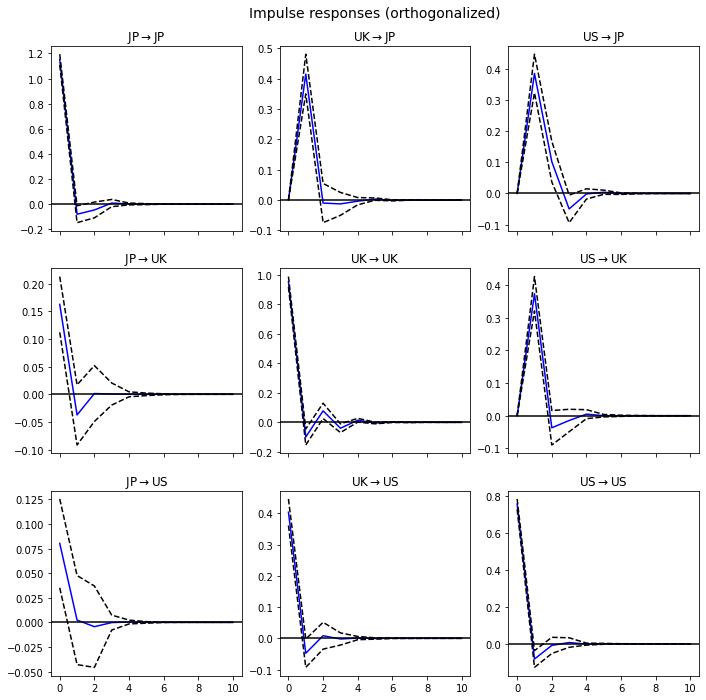

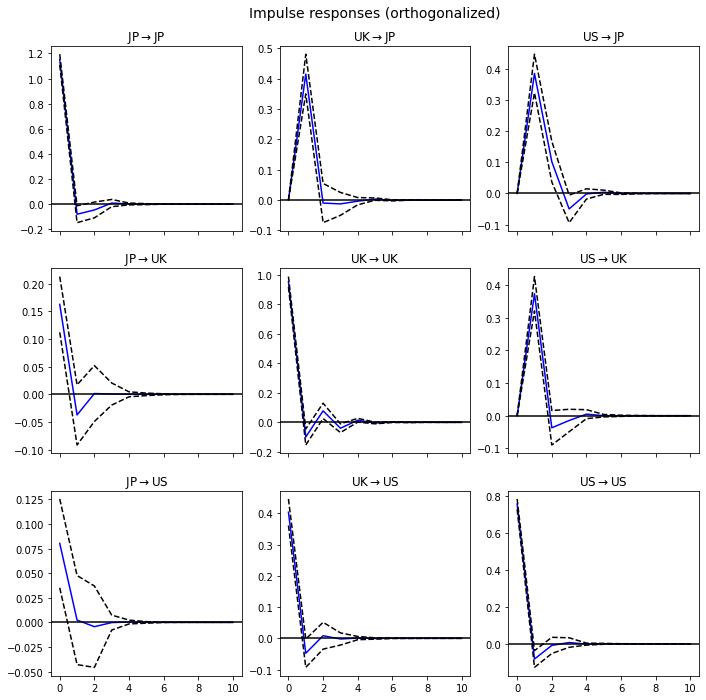

In [22]:
irf = model_result.irf(10)
irf.plot(orth=True)

### 以上の直行化インパルス応答関数は、沖本本とほぼ同様の形状（y軸の尺が異なる点に注意）。

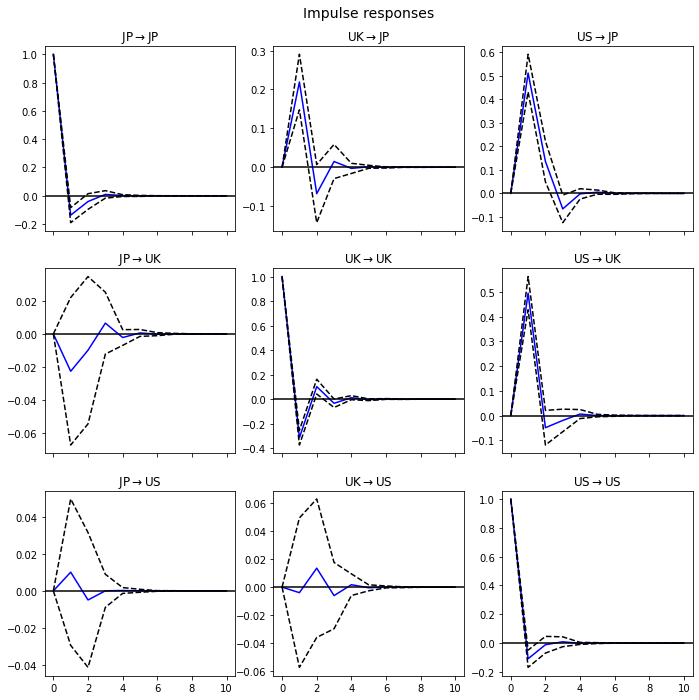

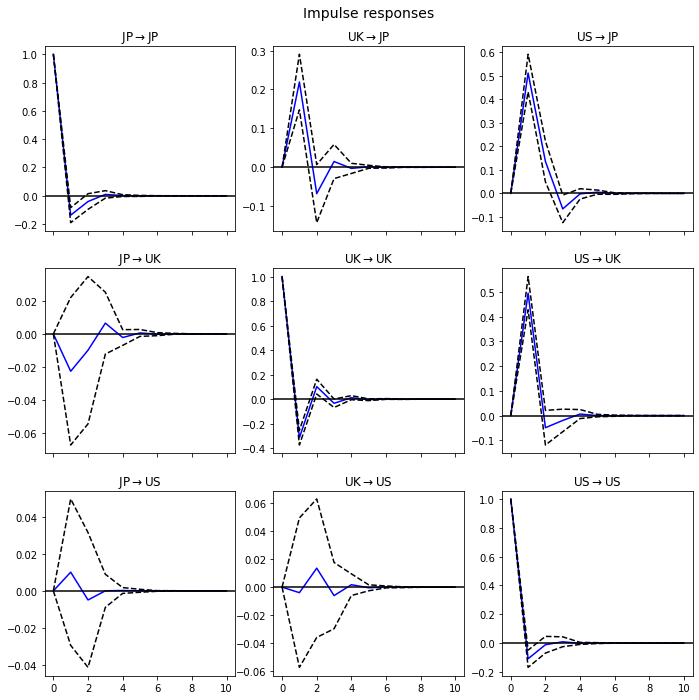

In [35]:
irf = model_result.irf(10)
irf.plot(orth=False)